<p class='notebook_header'><b>CS 309 - Robot Learning</b></p>
<p class='notebook_header'>Homework 1 - Adam Howard and Branden Heng</p>
<hr class='separate' />

<p class='section_header'><b>Part 1: Linear Algebra</b></p>

Implement the following matrix/vector functions using NumPy operations.

If the function's operation isn't possible for matrix or vector inputs, return None.

In [3]:
import numpy as np

In [4]:
def add(a, b):
    return a + b

def subtract(a, b):
    return a - b

def multiply(a, b):
    return np.dot(a, b)

def divide(a, b):
    return None

def transpose(a):
    return a.T

def two_norm(a):
    return np.linalg.norm(a)

<p>Using your code from above, solve the following equations. If an operation isn't possible, put None or comment with "Not Possible".</p>

$$
u = \begin{bmatrix} 2 \\ 3 \\ 9 \end{bmatrix}, \:
v = \begin{bmatrix} -2 \\ 1 \\ 8 \end{bmatrix}
$$  


In [5]:
u = np.array([
    [2],
    [3],
    [9]
])

v = np.array([
    [-2],
    [1],
    [8]
])

$$ u + v = \begin{bmatrix} ? \end{bmatrix} $$  

$$ u - v = \begin{bmatrix} ? \end{bmatrix} $$  

$$ u * v = \begin{bmatrix} ? \end{bmatrix} $$  

$$ u \div v = \begin{bmatrix} ? \end{bmatrix} $$  


In [6]:
# YOUR CODE HERE - Completed

u_plus_v = add(u, v)
print(u_plus_v, end = '\n\n')

u_minus_v = subtract(u, v)
print(u_minus_v, end = '\n\n')

u_mult_v = multiply(u.T, v)
print(u_mult_v)

# This operation is not possible
u_div_v = None

[[ 0]
 [ 4]
 [17]]

[[4]
 [2]
 [1]]

[[71]]


$$ u^{\;T} * v = \; ? $$  

$$ u * v^{\;T} = \begin{bmatrix} ? \end{bmatrix} $$  

$$ u^{\;T} * u = \; ? $$  

$$ \left \| u \right \|_{2}^{2} = ? $$  


In [7]:
# YOUR CODE HERE - Completed

u_transpose_v = multiply(u.T, v)
print(u_transpose_v, end = '\n\n')

u_v_transpose = np.outer(u, v.T)
print(u_v_transpose, end = '\n\n')

u_transpose_u = multiply(u.T, u)
print(u_transpose_u, end = '\n\n')

two_norm_u = two_norm(u)
print(two_norm_u)

[[71]]

[[ -4   2  16]
 [ -6   3  24]
 [-18   9  72]]

[[94]]

9.695359714832659


<hr class='light-separate' />

$$
A = \begin{bmatrix} 1 & 6 & 5\\ 0 & -4 & -1\\ 7 & 2 & 3 \end{bmatrix}, \: 
B = \begin{bmatrix} 3 & 1 & 1\\ 4 & -1 & 7\\ 7 & 0 & 0 \end{bmatrix}
$$  


$$ A + B = \begin{bmatrix} ? \end{bmatrix} $$  

$$ A - B = \begin{bmatrix} ? \end{bmatrix} $$  

$$ A * B = \begin{bmatrix} ? \end{bmatrix} $$  

$$ A \div B = \begin{bmatrix} ? \end{bmatrix} $$  


In [8]:
# YOUR CODE HERE - Completed

A = np.array([[1, 6, 5],
              [0, -4, -1],
              [7, 2, 3]])

B = np.array([[3, 1, 1],
              [4, -1, 7],
              [7, 0, 0]])

a_plus_b = add(A, B)
print(a_plus_b, end = '\n\n')

a_minus_b = subtract(A, B)
print(a_minus_b, end = '\n\n')

a_mult_b = multiply(A, B)
print(a_mult_b)

# This operation is not possible
a_div_b = None

[[ 4  7  6]
 [ 4 -5  6]
 [14  2  3]]

[[-2  5  4]
 [-4 -3 -8]
 [ 0  2  3]]

[[ 62  -5  43]
 [-23   4 -28]
 [ 50   5  21]]


<hr class='light-separate' />

$$
C = \begin{bmatrix} 5 & 1 \\ -1 & 7 \\ 3 & 0 \end{bmatrix}
$$  


In [9]:
c = np.array([[5, 1],
              [-1, 7],
              [3, 0]])

Right Pseudo Inverse of C:
$$ \begin{bmatrix} 0 & -0.0625 & 0.5 \\ 0.0625 & 0.125 & 0.125 \end{bmatrix} $$  
 

Left Pseudo Inverse of C:
$$ \begin{bmatrix} 0.1443299 & -0.02061856 & 0.08591065 \\ 0.0257732 & 0.13917526 & 0.00343643 \end{bmatrix} $$  

In [10]:
# YOUR CODE HERE - Completed

right_pinv = multiply(c.T, np.linalg.inv(multiply(c, c.T)))
print(right_pinv, end = '\n\n')

left_pinv = multiply(np.linalg.inv(multiply(c.T, c)), c.T)
print(left_pinv)

[[ 0.     -0.0625  0.5   ]
 [ 0.0625  0.125   0.125 ]]

[[ 0.1443299  -0.02061856  0.08591065]
 [ 0.0257732   0.13917526  0.00343643]]


<hr class='separate' />

<p class='section_header'><b>Part 2: Regression</b></p>

**Write** the equation for Ordinary Least Squares below. 

$$ \Theta = (x^{T}x)^{-1} * x^{T} * y $$

**Explain** Ordinary Least Squares in terms of what it optimizes.

**Explanation:** The purpose of OLS is to draw a regression line through a collection of data that results in the smallest sum of squared residuals. This value can be found for each data point by finding the y-distance from the data point to the regression line, and squaring it. The line created that has the lowest sum (the addition of the described operation performed on each data point) is the optimal line for the data based on this regression method.

In [11]:
# Don't change this cell!
# Load in the data about the study on students
train = np.loadtxt('train.csv', delimiter=',')
x_0, x_1, x_2, y = train.T
X_train = np.array([x_0, x_1, x_2]).T
Y_train = np.expand_dims(y, 1)

test = np.loadtxt('test.csv', delimiter=',')
x_0, x_1, x_2, y = test.T
X_test = np.array([x_0, x_1, x_2]).T
Y_test = np.expand_dims(y, 1)

There was an imaginary study done on 101 students at Crest University. The study surveyed students for the amount they have spent on electronics, books, pencils, and food.

Given that the **amount students spend on electronics ($Y$)** is linearly related to the **amount they spend on books ($ X_{0} $), pencils ($ X_{1}$)**, and **food ($ X_{2}$)**, 
**implement** the Ordinary Least Squares method to model this regression problem.

The data is read in from the previous cell code. **X_train** has the input features, while **Y_train** has corresponding target outputs.

After finding a solution, try to measure the error between your predictions and the ground truth. 

In [12]:
# TODO: Create code for OLS here. DO NOT use any other libraries in your first implementation.

def OLS(X, y):
    theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
    return theta

# TODO: check against training data
theta_0 = OLS(X_train, Y_train)
print(theta_0, end = '\n\n')

# TODO: test your model on testing data
theta_1 = OLS(X_test, Y_test)
print(theta_1, end = '\n\n')
Y_pred = np.dot(X_test, theta_1)
result = np.square(np.subtract(Y_test, Y_pred)).mean()
print(result)

[[-3884.63897009]
 [-9717.11198125]
 [ 1943.82567058]]

[[-38358.89260064]
 [-95902.72468824]
 [ 19180.94784402]]

22.945401691675993


**Explain** what collinearity is.

**Explanation:** Collinearity is a term that describes two independent variables in a regression function that are correlated. This means that they are closely related to one another, as through a functional relationship.

**Write** the equation for Ridge Regression below.
$$ \Theta = ((\Phi^{T} \Phi) + (\lambda I))^{-1} * (\Phi^{T} y) $$

**Explain** the purpose of ridge regression and its advantages and disadvantages over OLS.

**Explanation:** The most significant issue with OLS regression is that the regression line is very susceptible to being significantly skewed by data outliers. What ridge regression does is 'punish' the outlying data points in order to create a more accurate regression model. OLS also has issues with multicollinearity also that are accounted for in ridge regression.

**Implement** your regression model with ridge regression below.

In [13]:
# TODO: Create code for Ridge Regression here. DO NOT use any other libraries.

def RR(X, y, ridge=0.001):
    product = multiply(X.T, X)
    rows = product.shape[0]
    theta = multiply(multiply(np.linalg.inv(add(product, ridge * np.identity(rows))), X.T), y)
    return theta

# TODO: check against training data
theta = RR(X_train, Y_train)
print(theta, end = '\n\n')

# TODO: test your model on testing data
theta = RR(X_test, Y_test)
print(theta, end = '\n\n')
Y_pred = np.dot(X_test, theta)
result = np.square(np.subtract(Y_test, Y_pred)).mean()
print(result)

[[ 1.92519992]
 [-0.7015006 ]
 [ 0.54357729]]

[[ 1.80989722]
 [-0.97587051]
 [ 0.59920797]]

23.495653452967773


**Explain** the differences ridge regression created for theta compared to OLS, and why these differences even exist. Also try different values for the ridge parameters and describe how they affect your results.

**Explanation:** Ridge regression created a regression model that was much more accurate than the one that was created from OLS regression. These differences exist because ridge regression limits the influence of outlying data values whenever creating a regression model for the data. When altering the ridge variable for Ridge Regression though, it appeared that when the value was increased, the penalty term was of more effect, and when it was decreased, it lessened the effect of the punishment term in creating the regression line.

There are other regularizers other than ridge regression, such as LASSO. **Explain** the differences between LASSO and Ridge Regression and how it changes the solution mathematically.

**Explanation:** LASSO can sometimes result in the loss of data which will lead to models that are lackluster. This is because LASSO deals in L1 regularization whereas Ridge Regression uses L2 regularization. L1 and L2 are different in terms of their punishment term. LASSO will reduce less important data completely through the L1's punishment term, which is not desired in every case.

In [14]:
# TODO: Create code for LASSO here
 
from sklearn import linear_model

def LASSO(X, y, ridge=.001):
    line = linear_model.Lasso(alpha = ridge)
    line.fit(X, y)
    return line.coef_

# TODO: check against training data
theta = LASSO(X_train, Y_train)
print(theta, end = '\n\n')

# TODO: check against testing data
theta = LASSO(X_test, Y_test)
print(theta, end = '\n\n')
Y_pred = np.dot(X_test, theta)
result = np.square(np.subtract(Y_test, Y_pred)).mean()
print(result)

[ 2.99099792  2.01763613 -0.00368638]

[2.99318387e+00 1.99720599e+00 2.22150120e-03]

46239.34132635852


**Explain** the effect elastic nets had on your values for theta compared to OLS. Also try different values for the ridge parameters and describe how they affect your results.

**Explanation:** When using Elastic Net Regularizatin for the data, the mean distance of each point from the regression line seems to be much larger than when using OLS. Whenever the ridge value was changed for the Elastic Nets method, it hardly changed the mean y-distance of each data point from the regression line, but it appears that the mean y-distance decreased as the ridge value increased.

In [15]:
# TODO: Create code for Elastic Nets here. You can use a library such as scipy
# Code borrowed from Scipy page: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
    
def EN(X,y):
    X, y = make_regression(n_features = 3, random_state = 0)
    regr = ElasticNet(random_state = 0)
    regr.fit(X, y)
    return regr.coef_

# TODO: check against training data
theta = EN(X_train, Y_train)
print(theta, end = '\n\n')

# TODO: check against testing data
theta = EN(X_test, Y_test)
print(theta, end = '\n\n')
Y_pred = np.dot(X_test, theta)
result = np.square(np.subtract(Y_test, Y_pred)).mean()
print(result)

[24.79648533 41.67033897  5.17022768]

[24.79648533 41.67033897  5.17022768]

422224957.31703436


**Explain** the differences between LASSO, Ridge Regression and Elastic Nets and how it changes the solution mathematically.

**Explanation:** LASSO and Ridge Regression both have the possibility of underfitting or overfitting the regression line that is created for a group of data, as they are calculated with a single regularizer. With Elastic Nets, however, L1 and L2 regularization are combined, producing a model that more properly fits the data.

**Explain** the purpose of a regularizer.

**Explanation:** The purpose of a regularizer in a regression function is to limit the importance of outlying data values with multicollinear data points. This 'regulation' of these outlying data points assists in the creation of a more accurate regression model. It also seeks to prevent the overfitting or underfitting of a regression model through a collection of data.

Give two examples where a regularizer would give more robust models.

**Examples:** One example where a regularizer would benefit a predictive data model is in a model representing the relationship between a country's GDP and its per capita income. As one would expect, as a country's GDP increases, its per capita income is likely to increase also, and a regularizer would limit the influence of certain countries where this trend isn't necessarily true. A second example where using a regularizer can provide a more robust model is when looking for correlations between quality of education and poverty within a region, a regularizer can be utilized to find a model that isn't overfitting.

**Explain** with reference to the dataset why a regularizer achieved better performance than OLS.

**Explanation:** A specific example that we identified in the file test.csv are students 7 and 12 who spent roughly the same amount on electronics, but differing amounts on the other items. In total, Student 7 spent roughly 1,556.2 credits on items $x_{0}, x_{1}$, and $x_{2}$, and Student 2 spent roughly 1,786.5 credits on those items. Given how the x-values differed between the two students, when creating a regression line using OLS regression, the line would most likely be a skewed representation of the data. However, when adding a regularizer, the margin of error that is present using OLS is decreased, making it a better representation of the relationship between the data points.

<hr class='light-separate' />

Implement feature transformation to fit a line to the curve generated from the .csv file.

In [16]:
X = np.genfromtxt('feature_transform.csv', delimiter=',')
y = X[:,2].reshape(500, 1)
X = X[:,:2]

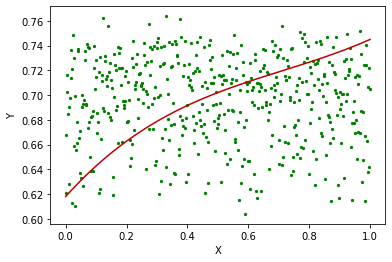

In [32]:
# TODO: Write the lambda function phi which will transform X
# TODO: Plot the transformation and the resulting line after transforming
# Code borrowed from Ilham's Office Hours
import matplotlib.pyplot as plt

def phi(x, degree):
    columns = []
    n = len(x)
    for i in range(degree + 1):
        if (i == 0):
            columns.append(np.ones(n))
        else:
            columns.append(x**i)
    X = np.matrix(columns).T
    return X

X_new = phi(X[:,0], 3)
theta = OLS(X_new, y)
coef = np.array(theta).ravel()
phi_plot = np.linspace(0, 1, 500)

def poly_coefficients(x, coefs):
    k = len(coefs)
    y = 0
    for i in range(k):
        y += coefs[i] * (x**i)
    return y

y_new = poly_coefficients(phi_plot, coef)

plt.scatter(phi_plot,y,s=5, color=(0.0,0.5,0.0))
plt.plot(phi_plot,y_new,color=(0.75,0.0,0.0))

plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<hr class='light-separate' />

Recall what you learned about polynomial regression and explain what is happening to the model as you increase the degrees. Run the cell below and use the slider to help you.

**Explanation:** When the degree of the regression line is increased from one to ten, the test and train errors have a trend of decreasing, and this makes sense because the data is not linear. However, as the degree increases past ten, the errors siginificantly increase due to the increased importance of outlying data values when plotting the regression line.

In [16]:
# DO NOT ALTER

import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

boston = datasets.load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)

X = data[['LSTAT']].values
y = data['MEDV']

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42, shuffle=True)

temp = pd.DataFrame({'x':x_train.reshape(1, 354)[0], 'y':y_train})
temp = temp.sort_values('x')
x_train = temp['x'].values.reshape(354,1)
y_train = temp['y'].values

temp = pd.DataFrame({'x':x_test.reshape(1, 152)[0], 'y':y_test})
temp = temp.sort_values('x')
x_test = temp['x'].values.reshape(152,1)
y_test = temp['y'].values

def f(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x_train,y_train)
    y_plot = model.predict(x_test)
    
    plt.scatter(x_train, y_train, s=10, color='red', alpha=.3)
    plt.scatter(x_test, y_test, s=10)

    test_sr = (y_test - y_plot)**2
    test_ssr = test_sr.sum()
    test_asr = test_ssr/len(test_sr)
    
    y_plot_train = model.predict(x_train)
    train_sr = (y_train - y_plot_train)**2
    train_ssr = train_sr.sum()
    train_asr = train_ssr/len(train_sr)
    
    plt.plot(x_test, y_plot, label="degree %d" % degree + '; Test Error: %.2f' % test_asr + '; Train Error: %.2f' % train_asr, color='green')
    plt.legend(loc='upper right')
    plt.show()
    
interact(f, degree = widgets.IntSlider(min=1, max=20, step=1, value=1))

interactive(children=(IntSlider(value=1, description='degree', max=20, min=1), Output()), _dom_classes=('widge…

<function __main__.f(degree)>